In [1]:
!sudo add-apt-repository -y ppa:sumo/stable
!sudo apt-get update
!sudo apt-get install -y sumo sumo-tools sumo-doc

Repository: 'deb https://ppa.launchpadcontent.net/sumo/stable/ubuntu/ jammy main'
Description:
SUMO is a highly portable, microscopic traffic simulation package designed to handle large road networks. SUMO is open source, licensed under the EPLv2.
More info: https://launchpad.net/~sumo/+archive/ubuntu/stable
Adding repository.
Adding deb entry to /etc/apt/sources.list.d/sumo-ubuntu-stable-jammy.list
Adding disabled deb-src entry to /etc/apt/sources.list.d/sumo-ubuntu-stable-jammy.list
Adding key to /etc/apt/trusted.gpg.d/sumo-ubuntu-stable.gpg with fingerprint 7604B28616B7E70EC0E6D840C32412BB1ADB414B
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]           
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]      
Hit:5 http://archive.ubuntu.com/ubuntu jammy 

In [2]:
!source ~/.bashrc

In [3]:
#!echo 'export SUMO_HOME="/usr/share/sumo"' >> ~/.bashrc
import os
os.environ['SUMO_HOME'] = '/usr/share/sumo'
print(os.environ['SUMO_HOME'])


/usr/share/sumo


In [4]:
!export LIBSUMO_AS_TRACI=1 #Notice that you will not be able to run with sumo-gui or with multiple simulations in parallel if this is active (more details).

In [5]:
#!unset LIBSUMO_AS_TRACI


In [6]:
!pip install sumo-rl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.9/149.9 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.2/126.2 kB 11.6 MB/s eta 0:00:00


In [7]:
!pip install stable-baselines3[extra]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 9.4 MB/s eta 0:00:00:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 43.8 MB/s eta 0:00:0000:01
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446667 sha256=586b8316683a14e641a1ab6e4f4596dc2c4abd48143d6a4bcf6eda841c9eafb7
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license
  Attempting uninstall: shimmy
    Found existing installation: Shimmy 1.3.0
    Uninstalling Shimmy-1.3.0:
      Successfully uninstalled Shimmy-1.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kaggle-environments 1.16

In [8]:
import os

subfolder_path = "/kaggle/working/net"
os.makedirs(subfolder_path, exist_ok=True)

In [9]:
import shutil

# Copying the first file to the working directory
shutil.copy("/kaggle/input/netzip6/net/single-intersection.net.xml",
            "/kaggle/working/net/single-intersection.net.xml")

# Copying the second file to the working directory
shutil.copy("/kaggle/input/netzip6/net/single-intersection-vhvh.rou.xml", "/kaggle/working/net/single-intersection-vhvh.rou.xml")


'/kaggle/working/net/single-intersection-vhvh.rou.xml'

In [10]:
!ls /kaggle/working/net


single-intersection.net.xml  single-intersection-vhvh.rou.xml


In [11]:
#!python /kaggle/input/netzip6/net/dqn_2way-single-intersection.py

In [12]:
from stable_baselines3 import DQN
from stable_baselines3.common.utils import get_device

device = get_device("cuda")
print("DQN Device:", device)  # Should print "cuda"


DQN Device: cuda


In [13]:
import os
import sys
import gymnasium as gym
from stable_baselines3.dqn.dqn import DQN
#import traci
from sumo_rl import SumoEnvironment
from stable_baselines3.common.monitor import Monitor
import matplotlib.pyplot as plt

if "SUMO_HOME" in os.environ:
    tools = os.path.join(os.environ["SUMO_HOME"], "tools")
    sys.path.append(tools)
else:
    sys.exit("Please declare the environment variable 'SUMO_HOME'")

if __name__ == "__main__":
    log_dir = "/kaggle/working/log_dir"
    os.makedirs(log_dir, exist_ok=True)
    
    # Initialize SUMO environment
    env = SumoEnvironment(
        net_file="/kaggle/working/net/single-intersection.net.xml",
        route_file="/kaggle/working/net/single-intersection-vhvh.rou.xml",
        out_csv_name="/kaggle/working/net/dqn",
        single_agent=True,
        use_gui=False,
        num_seconds=2000,
    )
    env = Monitor(env, log_dir)

    # Configure and initialize the DQN model
    model = DQN(
        env=env,
        policy="MlpPolicy",
        learning_rate=0.001,
        learning_starts=0,
        train_freq=1,
        target_update_interval=500,
        exploration_initial_eps=0.05,
        exploration_final_eps=0.01,
        verbose=1,
        device="cuda"
    )
    
    # Train for 100,000 timesteps
    model.learn(total_timesteps=100000)
    env.close()


 Retrying in 1 seconds


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Using cuda device
Wrapping the env in a DummyVecEnv.
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 400      |
|    ep_rew_mean      | -116     |
|    exploration_rate | 0.0436   |
| time/               |          |
|    episodes         | 4        |
|    fps              | 28       |
|    time_elapsed     | 55       |
|    total_timesteps  | 1600     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.666    |
|    n_updates        | 1599     |
----------------------------------
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 400      |
|    ep_rew_mean      | -61      |
|    exploration_rate | 0.0372   |
| time/               |          |
|    

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


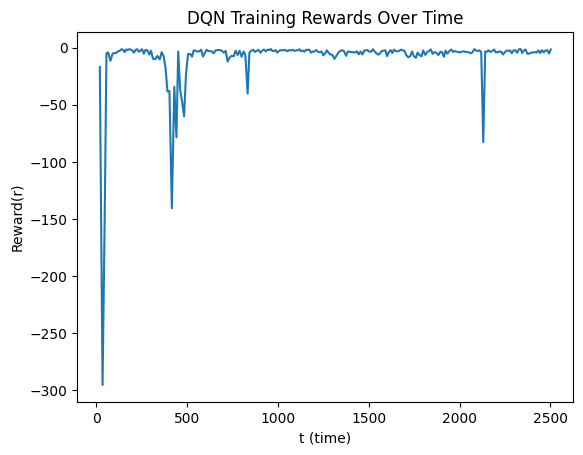

In [14]:
import ast

r = []
l = []
t = []
for file in os.listdir(log_dir):
    with open(os.path.join(log_dir, file), "r") as f:
        for line in list(f)[2:]:#skip first 2 lines
            line_sp=line.split(",")
            r.append(float(line_sp[0]))
            l.append(float(line_sp[1]))
            t.append(float(line_sp[2]))

    # Plotting the rewards per episode
plt.plot(t,r)
plt.title('DQN Training Rewards Over Time')
plt.xlabel('t (time)')
plt.ylabel('Reward(r)')
plt.show()